# SciPy Utilities

Installation:

    conda install scipy

General notes on Sci-Py:
- Built on top of numpy, and fully compatible with its data structures
- Natural extension of numpy for maths applications: linear algebra, statistics, etc.
- Very fast (as numpy)

Overview of topics covered in this notebook:
1. Statistics / Probability distributions
2. IO
3. Special functions
4. Linear Algebra
5. Discrete Fourier Transform
6. Optimization
7. Integration

I compiled this notebook from several sources, such as:
https://www.guru99.com/scipy-tutorial.html


## 1. Statistics / Probability Distributions

Load distributions:
```python
from scipy.stats import binom,norm,cauchy
```
Instantiate a distribution with its parameters:
```python    
dist = binom(n, b)
dist = norm(m, s)
dist = cauchy(z, g)
...
```

Distributions have usually at least the `loc` and `scale` parameters, which are often related to the `mean` and `stddev`.

Get data:
```python
dist.rvs(N) # N random variables of the distribution
dist.pmf(x) # Probability Mass Function at values x for discrete distributions
dist.pdf(x) # Probability Density Function at values x for continuous distributions
dist.cdf(x) # Cumulative Distribution Function at values x for any distribution
dist.ppf(q) # Percent point function (inverse of `cdf`) at q (% of accumulated area) of the given RV
```
Note: `dist.cdf(v)` = $P (x < v)$; $P(x < \infty) = 1$

Fitting data to a distribution:
```python
# Choose distrbution or iterate through a set of candidates
# Data: replace this with real dataset
data = dist.rvs(10)
# Fit
params = dist.fit(data)
# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]
# Calculate fitted PDF and error with fit in distribution
pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))
```

Get parameters:
```python
params = dist.stats() # Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’)
m = dist.mean()
std = dist.std()
...
```

Documentation:

    help(scipy.stat)
    https://docs.scipy.org/doc/scipy/reference/index.html

### Example plots

In [11]:
import numpy as np
from scipy.stats import binom, norm, cauchy
from matplotlib import pyplot as plt
%matplotlib inline

#### Binomial

In [22]:
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

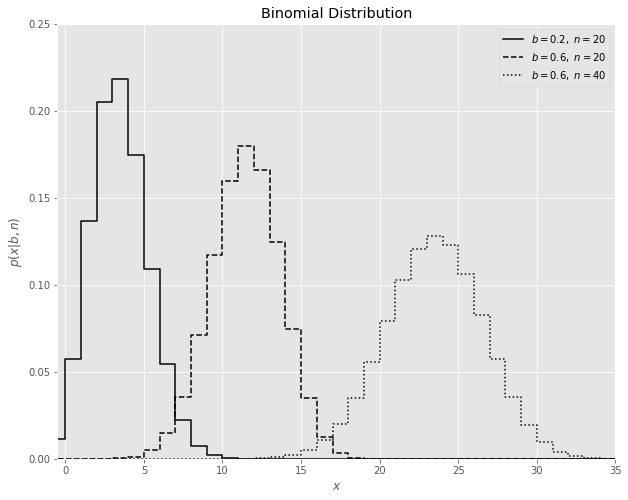

In [23]:
# Probability Mass Function
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    # NOTE: if we have a discrete distribution, use plt.step(), not plt.plot()
    plt.step(x, dist.pmf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

In [24]:
# Five random numbers in the Binomial distirbution B(40,0.6)
dist = binom(40, 0.6)
dist.rvs(5)

array([25, 21, 20, 30, 22])

In [25]:
# Get the parameters
params = dist.stats()
m = dist.mean()
std = dist.std()
print(params, m, std)

(array(24.), array(9.6)) 24.0 3.0983866769659336


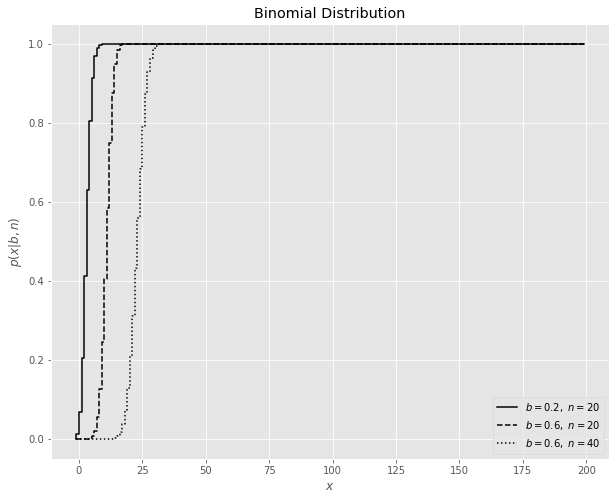

In [26]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    plt.step(x, dist.cdf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

#### Normal

In [12]:
m_values = [0, 0, 1]
s_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

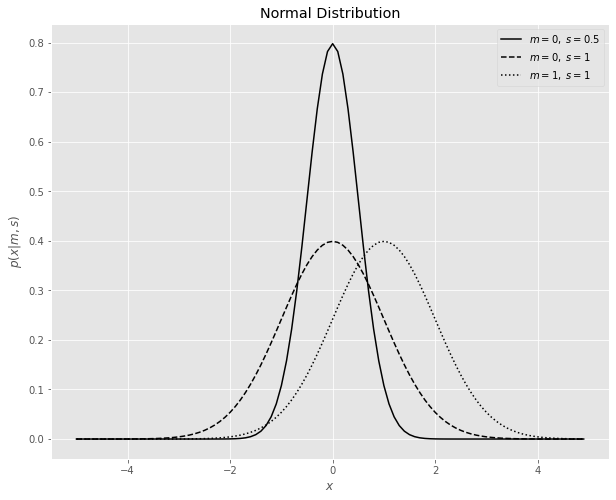

In [13]:
# Probability Distribution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Normal Distribution')

plt.legend()
plt.show()

In [14]:
# Five random numbers in the Normal distirbution N(1,1)
dist = norm(1, 1)
dist.rvs(5)

array([1.66423314, 0.87926233, 1.13713857, 3.00059112, 1.10894673])

In [21]:
# Get the parameters
params = dist.stats()
m = dist.mean()
std = dist.std()
print(params, m, std)

(array(1.), array(1.)) 1.0 1.0


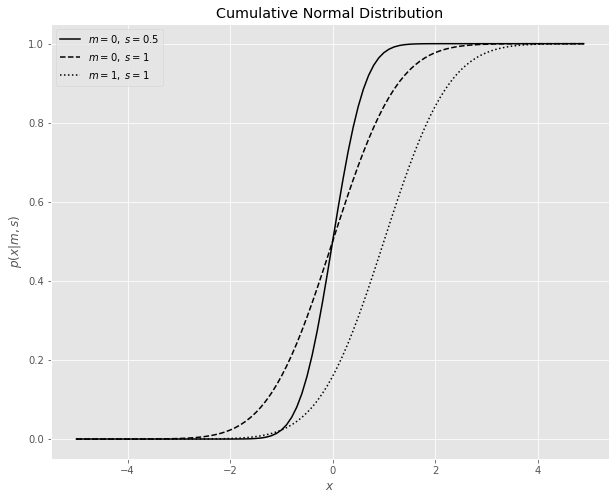

In [16]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Cumulative Normal Distribution')

plt.legend()
plt.show()

#### Cauchy

In [32]:
z_values = [0, 0, 1]
g_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

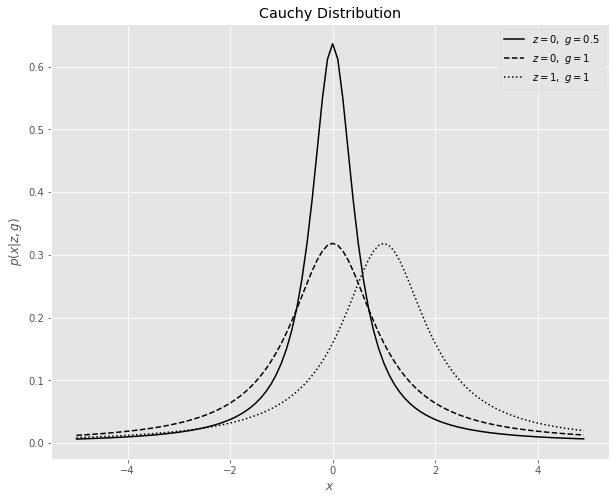

In [33]:
# Probability Distribution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

In [37]:
# Five random numbers in the Normal distirbution N(1,1)
dist = cauchy(1, 1)
dist.rvs(5)

array([  1.54025949,   2.20982686,  -0.43912915,  -0.52560434,
       -37.45269839])

In [42]:
# Get the parameters
params = dist.stats()
m = dist.mean()
std = dist.std()
print(params, m, std)

(array(nan), array(nan)) nan nan


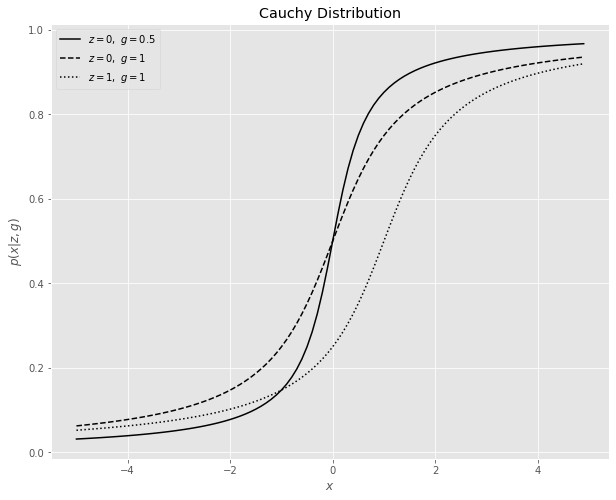

In [36]:
# Cumulative Distrubution Function
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

### Fitting data to a distribution

We have a dataset represented with a histogram and we would like to find the parameters of the continuous distribution that best match our data.

Solutions as described in 
https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [2]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [4]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

Text(0, 0.5, 'Frequency')

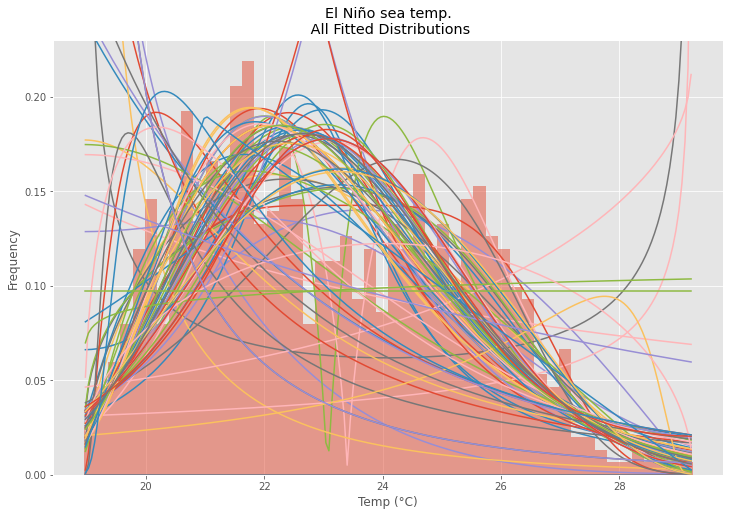

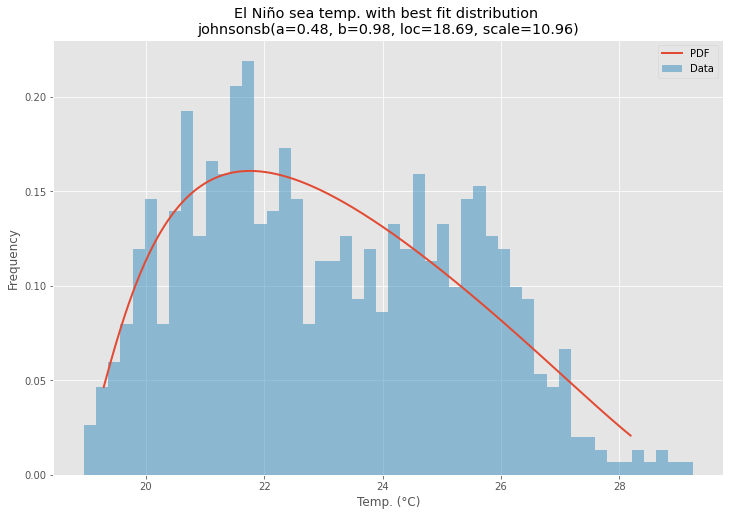

In [8]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

## 2. File IO

In [47]:
# Many formats are supported: Matlab, Arff, Wave, Matrix Market, IDL, NetCDF, TXT, CSV and binary format
import numpy as np
from scipy import io as sio
array = np.ones((4, 4))
# Example: Matlab format
sio.savemat('example.mat', {'ar': array}) 
data = sio.loadmat('example.mat', struct_as_record=True)
data['ar']

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 3. Special Functions

There is a module that contains special functions, most of them universal; they follow array operations, etc.

In [ ]:
import scipy.special
help(scipy.special)

In [51]:
# Cubic root
from scipy.special import cbrt
cb = cbrt([27, 64])
print(cb)

[3. 4.]


In [53]:
# Exponential: 10**x
from scipy.special import exp10
exp = exp10([1,10])
print(exp)

[1.e+01 1.e+10]


In [54]:
# Combinations & Permutations

**Combinations**: a selection of items from a collection, such that the order of selection does not matter

`Comb(n,k)` $ =  \binom nk = \frac{n!}{k!(n-k)!} = \frac{n(n-1)\dotsb(n-k+1)}{k(k-1)\dotsb1}$

Example: the number of five-card hands possible from a standard fifty-two card deck = `Comb(52,5)`.

**Permutations** of a set is, loosely speaking, an arrangement of its members into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements.

`Perm(n,k)` $ = \frac{n!}{(n-k)!} = n(n-1)\dotsb(n-k+1)$

Examples:
- we have 3 tests provided in series, how many participants do we need to cover all possible test orders=? `Perm(3,3)` $= 3 \cdot 2 \cdot 1 = 6$
- we have 12 songs; we want to record a sequence of 4 of them into a CD - how many posibilities do we have? `Perm(12,4)`

In [55]:
from scipy.special import comb
com = comb(5, 2, exact = False, repetition=True)
print(com)

15.0


In [56]:
from scipy.special import perm
per = perm(5, 2, exact = True)
print(per)

20


In [59]:
# Logsum exponential: log(exp(x_1)+exp(x_2)+...+exp(x_n))
from scipy.special import logsumexp
ls = logsumexp([27, 64])
print(ls)

64.0


## 4. Linear Algebra

In [61]:
# Determinant
from scipy import linalg
import numpy as np
two_d_array = np.array([ [4,5], [3,2] ])
linalg.det(two_d_array)

-7.0

In [63]:
# Inverse
from scipy import linalg
import numpy as np
two_d_array = np.array([ [4,5], [3,2] ])
linalg.inv(two_d_array)

array([[-0.28571429,  0.71428571],
       [ 0.42857143, -0.57142857]])

In [65]:
# Eigenvalues
from scipy import linalg
import numpy as np
arr = np.array([[5,4],[6,3]])
eg_val, eg_vect = linalg.eig(arr)
print(eg_val)
print(eg_vect)

[ 9.+0.j -1.+0.j]
[[ 0.70710678 -0.5547002 ]
 [ 0.70710678  0.83205029]]


In [68]:
# Pseudoinverse
from scipy import linalg
a = np.random.randn(3, 2)
B = linalg.pinv(a)
print(B)

[[ 1.20181573 -1.24520356 -1.61255865]
 [-0.20046178  0.5059765   1.10774114]]


In [69]:
# Singular Value Decomposition
from scipy import linalg
m, n = 9, 6
a = np.random.randn(m, n) + 1.j*np.random.randn(m, n)
U, s, Vh = linalg.svd(a)
U.shape,  s.shape, Vh.shape

((9, 9), (6,), (6, 6))

In [70]:
# Reconstruct from SVD decomposition
sigma = np.zeros((m, n))
for i in range(min(m, n)):
    sigma[i, i] = s[i]
a1 = np.dot(U, np.dot(sigma, Vh))
np.allclose(a, a1)

True

In [72]:
# Linear equation solving
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
from scipy import linalg
x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [73]:
np.dot(a, x) == b

array([ True,  True,  True])

## 5. Discrete Fourier Transform

In [74]:
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

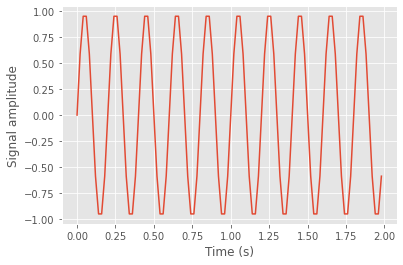

In [75]:
# Frequency in Hertz
fre = 5 
# Sample rate
fre_samp = 50
t = np.linspace(0, 2, 2 * fre_samp, endpoint = False)
a = np.sin(fre  * 2 * np.pi * t)
figure, axis = plt.subplots()
axis.plot(t, a)
axis.set_xlabel ('Time (s)')
axis.set_ylabel ('Signal amplitude')
plt.show()

In [78]:
# FFT
from scipy import fftpack
A = fftpack.fft(a)
frequency = fftpack.fftfreq(len(a)) * fre_samp

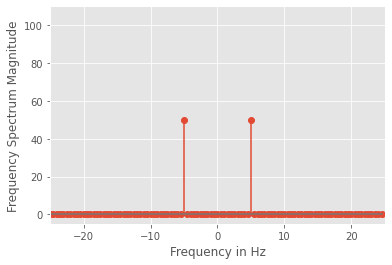

In [79]:
# Plot frequencies
figure, axis = plt.subplots()
axis.stem(frequency, np.abs(A))
axis.set_xlabel('Frequency in Hz')
axis.set_ylabel('Frequency Spectrum Magnitude')
axis.set_xlim(-fre_samp / 2, fre_samp/ 2)
axis.set_ylim(-5, 110)
plt.show()

## 6. Optimization

There are many other optimization methods: Least-Squares, Nelder–Mead, Levenberg–Marquardt, ...

And also optimization-related applications, eg.: `scipy.optimize.root`, `scipy.optimize.linprog` (Simplex).

#### Curve Fitting: `scipy.optimize.curve_fit`

- it uses non-linear least squares to fit a function, f, to data.
- it assumes `ydata = f(xdata, *params) + eps`

In [93]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [94]:
# Define parametric function to be fitted
# Its parameters are to be found!
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

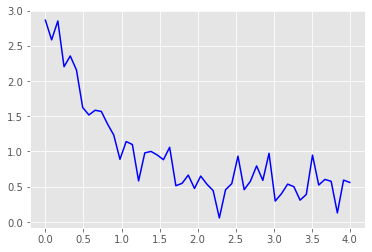

In [95]:
# Generate data and add noise
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [96]:
# Fit parametric curve
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.55423706, 1.35190947, 0.47450618])

In [97]:
# Fit parametric curve with contraints:
# 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt2

array([2.43708905, 1.        , 0.35015434])

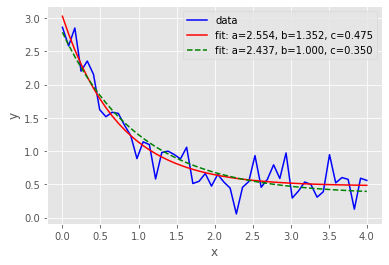

In [99]:
# Plot all
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt2), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 7. Numerical Integration

`scipy.integrate.quad`: general purpose integration

In [102]:
from scipy import integrate
# Define f(x)
f = lambda x : x**2
# Single integration with a = 0 & b = 1: int(f(x),a,b) 
integration = integrate.quad(f, 0 , 1)
# First value: integration; Second: approximated error
print(integration)

(0.33333333333333337, 3.700743415417189e-15)
